In [2]:
from tensorflow import keras
model = keras.models.load_model(r"C:\Users\sohan\Downloads\vgg16_model.h5")

In [3]:
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
import cv2

In [4]:
from PIL import Image
import numpy as np

1/1 [==============================] - 0s 13ms/step
bcc


C:\Users\sohan\AppData\Local\Temp\ipykernel_18508\3414355087.py:26: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)


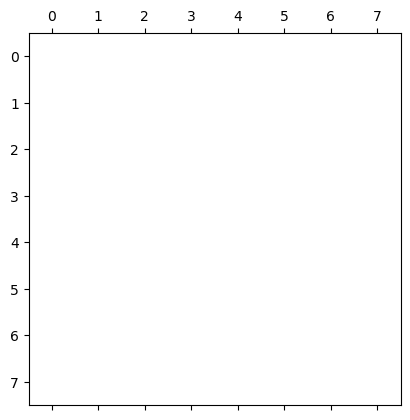

C:\Users\sohan\AppData\Local\Temp\ipykernel_18508\3414355087.py:36: RuntimeWarning: invalid value encountered in cast
  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)


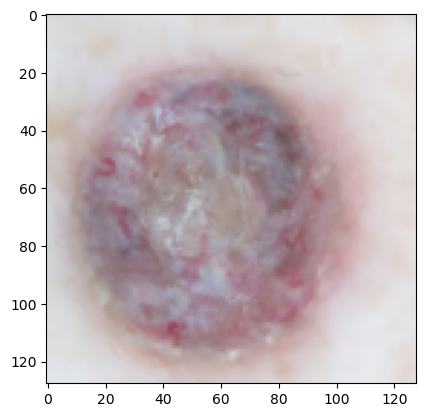

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


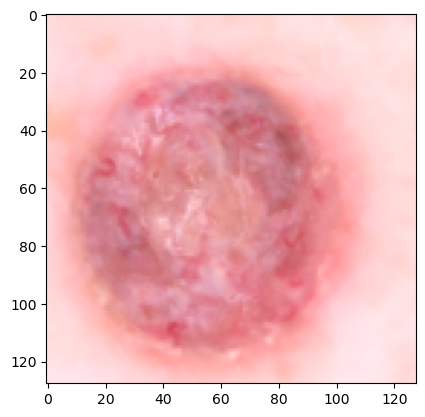

In [6]:
img_path = "C:\Training\Training\BCC\ISIC_0053863.jpg"

img = Image.open(img_path)
img_resized = img.resize((128,128))
pixels = np.asarray(img_resized)  # convert image to array
pixels = pixels.astype('float32')

input = np.expand_dims(pixels, axis=0)

species = ['bcc','bkl','mel','nv']

preds = model.predict(input)
print(species[np.argmax(preds[0])])

with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer('block5_conv3')
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(input)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8,8))
plt.matshow(heatmap)
plt.show()

INTENSITY = 0.5

raw = Image.open(img_path)
raw = raw.resize((128,128))
heatmap = cv2.resize(heatmap, (128,128))
heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)


img = (heatmap * INTENSITY + np.array(raw))/255

plt.imshow(raw)
plt.show()
plt.imshow(img)
plt.show()